# Predicting the sale price of bulldozers using Machine Learning

In this project, we're going to go through an example machine learning project with the goal of predicting future sale price of bulldozers

## 1. Problem definition
> How well can we predict the future sale price of a bulldozer given its characteristics based on previous examples of sale price of similar bulldozers

## 2. Data
The data is downloaded from kaggle Bluebook for Bulldozers competitions: https://www.kaggle.com/c/bluebook-for-bulldozers/data

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4. Features
Kaggle provides a data dictionary detailing all of the features of the dataset:- https://www.kaggle.com/c/bluebook-for-bulldozers/data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [5]:
# Import training and validation data
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                low_memory=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [9]:
# counting missing values of various features
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

[]

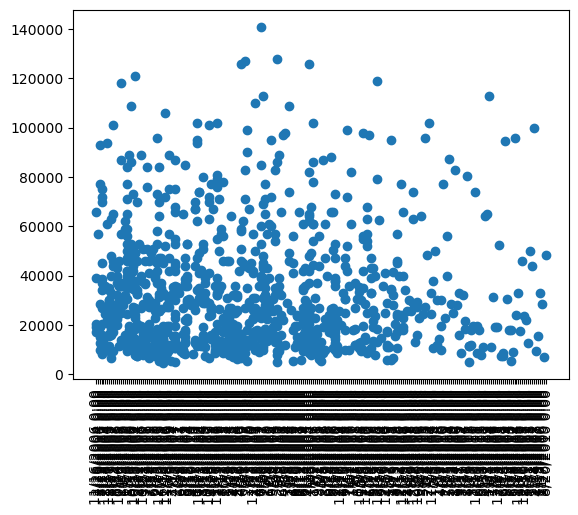

In [24]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])
plt.xticks(rotation=90)
plt.plot()

<Axes: ylabel='Frequency'>

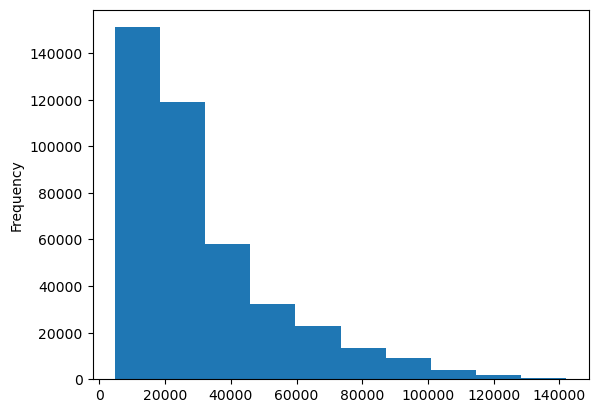

In [25]:
df.SalePrice.plot.hist()

### Parsing date

**NOTE:** The above saledate vs SalePrice plot is messed up because saledate is an object. We need to change **saledate** to datetime to visualize it better.

Now, we are gonna import our data again, and parse **saledate** to datatime using parse_dates parameter

In [34]:
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                low_memory=False,
                parse_dates=['saledate'])

In [35]:
df.saledate.dtype

dtype('<M8[ns]')

In [36]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

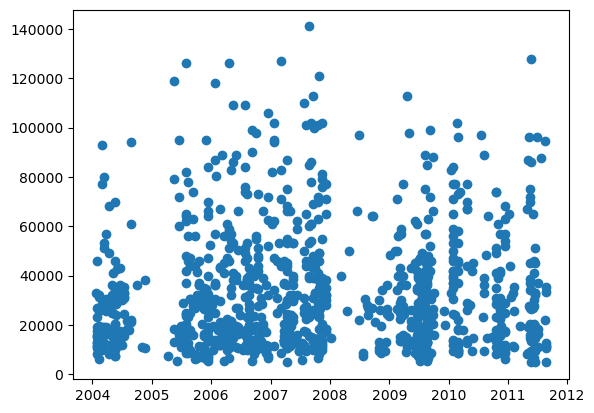

In [37]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [39]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort DataFrame by saledate

When working with time series data. It's a good idea to sort it by date.

In [51]:
# Sort DataFrame in date order
df.sort_values('saledate', inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
140257   1989-01-31
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
115892   1989-01-31
134080   1989-01-31
92294    1989-01-31
31494    1989-01-31
140922   1989-01-31
66337    1989-01-31
82122    1989-01-31
92256    1989-01-31
145670   1989-01-31
92780    1989-01-31
238373   1989-01-31
127132   1989-01-31
115102   1989-01-31
32317    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [54]:
df.saledate.tail(20)

409896   2012-04-28
411649   2012-04-28
411599   2012-04-28
411465   2012-04-28
406109   2012-04-28
412436   2012-04-28
406223   2012-04-28
410564   2012-04-28
405797   2012-04-28
409901   2012-04-28
405913   2012-04-28
405915   2012-04-28
411423   2012-04-28
412544   2012-04-28
405777   2012-04-28
411889   2012-04-28
407124   2012-04-28
407382   2012-04-28
411527   2012-04-28
409203   2012-04-28
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

It is a good practice to make a copy of the original DataFrame, so when we manipulate the copy, we'll still have the original data.

In [55]:
# Make a copy
df_tmp = df.copy()

In [56]:
df_tmp.saledate.head(20)

205615   1989-01-17
140257   1989-01-31
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
115892   1989-01-31
134080   1989-01-31
92294    1989-01-31
31494    1989-01-31
140922   1989-01-31
66337    1989-01-31
82122    1989-01-31
92256    1989-01-31
145670   1989-01-31
92780    1989-01-31
238373   1989-01-31
127132   1989-01-31
115102   1989-01-31
32317    1989-01-31
Name: saledate, dtype: datetime64[ns]